In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [11]:
X, y = datasets.make_blobs(n_samples=10000, n_features=2, centers=2,random_state=999999)

In [12]:
test_size = int(0.8* len(X))
X_train, X_test = X[:test_size], X[test_size:]
y_train, y_test = y[:test_size], y[test_size:]

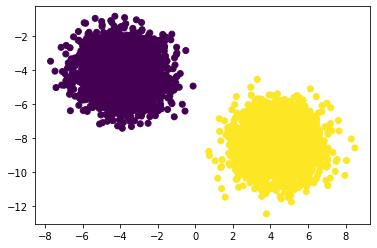

In [13]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

In [5]:
class Perceptron:
    
    def __init__(self, eta = 0.01, n_iter = 100):
        self.eta = eta
        self.n_iter = n_iter
        self.weight = []
        self.bias = 0
        self.error = []
        self.xi = []
        self.yi = []
    
    def train(self, X, y):
        dim = X.shape[1]
        self.weight = np.zeros(dim)
        self.bias = 1
        
        
        for _ in range(self.n_iter):
            
            m = 0
            for idx, x_i in enumerate(X):
                
                y_pred = self.transfer_function(self.weight.dot(x_i) + self.bias)
                
                m += (y[idx] - y_pred) ** 2
                self.weight = self.weight +  self.eta * (y[idx] - y_pred) * x_i
                self.bias = self.bias + self.eta * (y[idx] - y_pred)
                
            self.plot(X, y, self.weight, self.bias)
            self.error.append(m)
            
            #plt.show()
    
    def plot(self, X, y, weight, bias):
        
        
        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = (-weight[0] * x0_1 - bias) / weight[1]
        x1_2 = (-weight[0] * x0_2 - bias) / weight[1]
        
        self.xi.append([x0_1, x0_2])
        self.yi.append([x1_1, x1_2])
        
        
        
    def decision_boundary(self):
        
        return (self.xi,self.yi) 
        
    def predict(self, X):
        
        return self.transfer_function(np.dot(X, self.weight) + self.bias)
    
    def transfer_function(self, x):
        return np.where(x >= 0, 1, 0)
    
    def confusion_matrix(self, y, y_pred):
        
        classes = np.unique(y)
        
        conf_mat = np.zeros((len(classes), len(classes)))
        for i in range(len(classes)):
            for j in range(len(classes)):
                conf_mat[i, j] = np.sum((y == classes[i]) & (y_pred == classes[j]))
        return conf_mat
        
    def error_iteration_curve(self):
        
        fig = plt.figure(figsize=(20,9))
        plt.xlabel('Iteration no.')
        plt.ylabel('Error')
        plt.plot(self.error,color = 'tab:red')
        plt.show()            

In [6]:
p = Perceptron()
p.train(X_train, y_train)

In [7]:
y_pred = p.predict(X_test)

In [8]:
conf = p.confusion_matrix(y_test,y_pred)
conf 

array([[1036.,    0.],
       [   0.,  964.]])

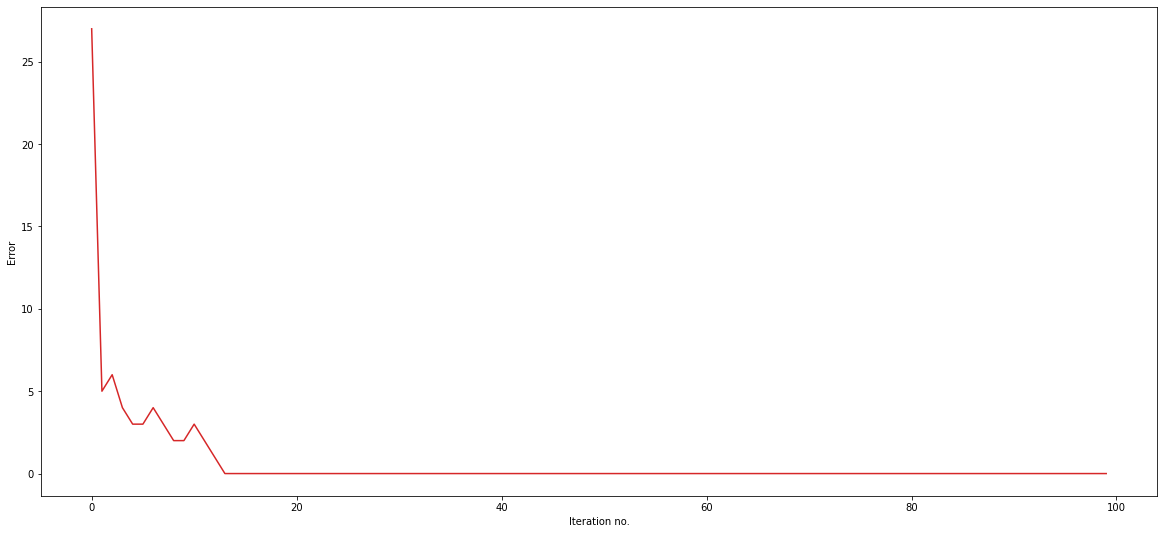

In [9]:
p.error_iteration_curve()

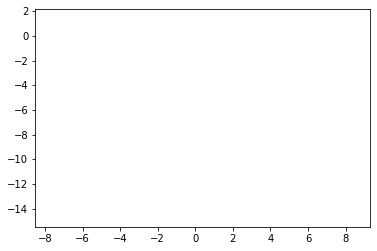

In [10]:
from celluloid import Camera
from IPython.display import HTML

w0, w1 = p.decision_boundary()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

        
ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])     
camera = Camera(fig)
for i in range(len(w0)):
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)
    ax.plot(w0[i],w1[i], 'k')
    camera.snap() 
animation = camera.animate()
HTML(animation.to_jshtml())
